In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Binary.com tick history/R_50/R_50.xlsx")

In [ ]:
prices = np.array(data.loc[:, 'Price'])

In [ ]:
prices

array([204.2994, 204.2843, 204.2609, ..., 212.5377, 212.5398, 212.5399])

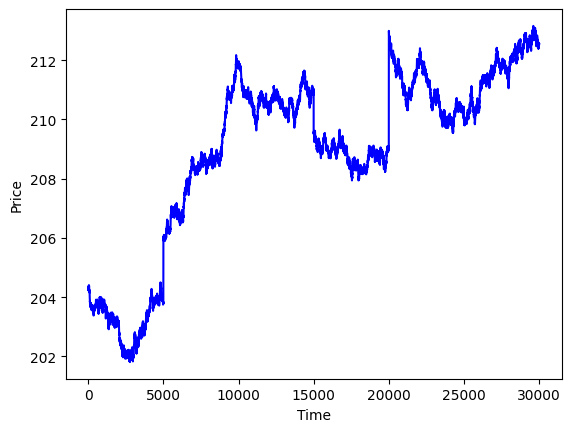

In [ ]:
import matplotlib.pyplot as plt

a = []
for i in range(len(prices)):
  a.append(i)
a = np.array(a)

plt.plot(a, prices, 'b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [ ]:
# Data preprocessing
# 01

q = []
#dataset = np.array([])
dataset = np.empty((0, 100)) 

for k in range(0, len(prices), 5000):
  r = 0
  y = k
  for i in range(4800):
    p = []
    r = y
    for j in range(100):
      p.append(prices[r])
      #print(r)
      r = r + 1
    dataset = np.append(dataset, [p], axis = 0)
    y = y + 1
dataset.shape

(28800, 100)

In [ ]:
dataset

array([[204.2994, 204.2843, 204.2609, ..., 204.0892, 204.0825, 204.0721],
       [204.2843, 204.2609, 204.3022, ..., 204.0825, 204.0721, 204.0223],
       [204.2609, 204.3022, 204.2676, ..., 204.0721, 204.0223, 204.0387],
       ...,
       [212.7084, 212.7098, 212.6679, ..., 212.5154, 212.482 , 212.4789],
       [212.7098, 212.6679, 212.5835, ..., 212.482 , 212.4789, 212.488 ],
       [212.6679, 212.5835, 212.5817, ..., 212.4789, 212.488 , 212.4745]])

In [ ]:
import pandas as pd
z = pd.DataFrame(dataset)
z

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,204.2994,204.2843,204.2609,204.3022,204.2676,204.2589,204.2417,204.2488,204.2875,204.2654,...,204.2126,204.2096,204.1877,204.1513,204.1530,204.1016,204.0770,204.0892,204.0825,204.0721
1,204.2843,204.2609,204.3022,204.2676,204.2589,204.2417,204.2488,204.2875,204.2654,204.3088,...,204.2096,204.1877,204.1513,204.1530,204.1016,204.0770,204.0892,204.0825,204.0721,204.0223
2,204.2609,204.3022,204.2676,204.2589,204.2417,204.2488,204.2875,204.2654,204.3088,204.3299,...,204.1877,204.1513,204.1530,204.1016,204.0770,204.0892,204.0825,204.0721,204.0223,204.0387
3,204.3022,204.2676,204.2589,204.2417,204.2488,204.2875,204.2654,204.3088,204.3299,204.3100,...,204.1513,204.1530,204.1016,204.0770,204.0892,204.0825,204.0721,204.0223,204.0387,204.0276
4,204.2676,204.2589,204.2417,204.2488,204.2875,204.2654,204.3088,204.3299,204.3100,204.2989,...,204.1530,204.1016,204.0770,204.0892,204.0825,204.0721,204.0223,204.0387,204.0276,204.0121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,212.6950,212.7290,212.7084,212.7098,212.6679,212.5835,212.5817,212.5460,212.5531,212.5457,...,212.6999,212.6708,212.5937,212.6200,212.6251,212.6264,212.6255,212.5819,212.5499,212.5154
28796,212.7290,212.7084,212.7098,212.6679,212.5835,212.5817,212.5460,212.5531,212.5457,212.5409,...,212.6708,212.5937,212.6200,212.6251,212.6264,212.6255,212.5819,212.5499,212.5154,212.4820
28797,212.7084,212.7098,212.6679,212.5835,212.5817,212.5460,212.5531,212.5457,212.5409,212.5324,...,212.5937,212.6200,212.6251,212.6264,212.6255,212.5819,212.5499,212.5154,212.4820,212.4789
28798,212.7098,212.6679,212.5835,212.5817,212.5460,212.5531,212.5457,212.5409,212.5324,212.5586,...,212.6200,212.6251,212.6264,212.6255,212.5819,212.5499,212.5154,212.4820,212.4789,212.4880


In [ ]:
# Labels

labels1 = []
for k in range(0, len(prices), 5000):
  for j in range(k+99,k+4899):
    lab = (prices[j+10] - prices[j])
    if lab > 0:
      lab = 2
    if lab < 0:
      lab = 1
    if lab == 0:
      lab = 0
    labels1.append(lab)
labels1 = np.array(labels1)

In [ ]:
len(labels1)

28800

In [ ]:
labels1

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
np.max(labels1)

2

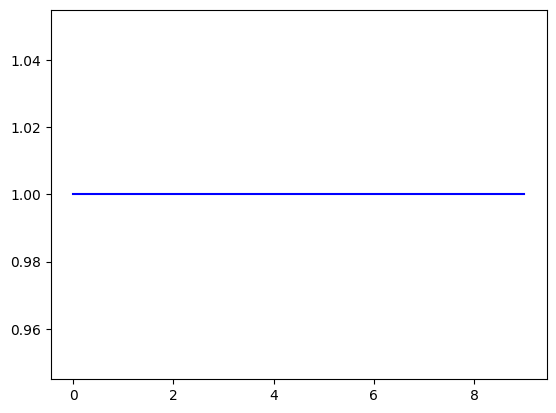

In [ ]:
# Plot labels
q = []
for i in range(len(labels1[:10])):
    q.append(i)

plt.plot(q, labels1[:10], 'b')
# plt.xlabel('Time')
# plt.ylabel('Price')
plt.show()

In [ ]:
def sig_image(data,size):
    X=np.zeros((data.shape[0],size,size))
    for i in range(data.shape[0]):
        X[i]=(data[i,:].reshape(size,size))
    return X.astype(np.float16)

def mean(data,no_elements):
    X=np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[1]-no_elements+1):
        X[:,i]=np.mean(data[:,i:i+no_elements],axis=1)
    return X.astype(np.float16)

def median(data,no_elements):
    X=np.zeros((data.shape[0],data.shape[1]))
    for i in range(data.shape[1]-no_elements+1):
        X[:,i]=np.median(data[:,i:i+no_elements],axis=1)
    return X.astype(np.float16)

In [ ]:
channel_mean=(mean(dataset,5)).astype(np.float16)
x_m=sig_image(channel_mean,10)

channel_median=(median(dataset,5)).astype(np.float16)
x_md=sig_image(channel_median,10)

In [ ]:
dataset1 = sig_image(dataset,10)
dataset1.shape

(28800, 10, 10)

In [ ]:
X=np.stack((dataset1, x_m),axis=1).astype(np.float16)
X.shape

(28800, 2, 10, 10)

In [ ]:
from sklearn.model_selection import train_test_split
trainx, testx, trainlabel, testlabel = train_test_split(X, labels1, test_size=0.2, random_state=20)

sig_train1, sig_test1 = trainx,testx
lab_train1, lab_test1 = trainlabel,testlabel
sig_train1.shape, sig_test1.shape

((23040, 2, 10, 10), (5760, 2, 10, 10))

In [ ]:
sig_train = torch.from_numpy(sig_train1)
sig_test = torch.from_numpy(sig_test1)
lab_train= torch.from_numpy(lab_train1)
lab_test = torch.from_numpy(lab_test1)

In [ ]:
import torch.utils.data as data_utils

batch_size = 1024
train_tensor = data_utils.TensorDataset(sig_train, lab_train) 
train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = False)

In [ ]:
batch_size = 128
test_tensor = data_utils.TensorDataset(sig_test, lab_test) 
test_loader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = False)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(2, 32, kernel_size=4,stride=1,padding = 1)
        self.mp1 = nn.MaxPool2d(kernel_size=2,stride=1)
        self.conv2 = nn.Conv2d(32,64, kernel_size=4,stride =1,padding = 1)
        self.mp2 = nn.MaxPool2d(kernel_size=2,stride=1)
        self.fc1= nn.Linear(2304,256)
        self.dp1 = nn.Dropout(p=0.1)
        self.fc2 = nn.Linear(256,3)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp1(self.conv1(x)))    
        x = F.relu(self.mp2(self.conv2(x)))
        x = x.view(in_size,-1)
        x = F.relu(self.fc1(x))
        x = self.dp1(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)

In [ ]:
cnn = CNN().double()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)

In [ ]:
num_epochs = 10

In [ ]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (signals, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        # Run the forward pass
        signals=signals
        labels=labels
        outputs = cnn(signals.double())
        loss = criterion(outputs, labels.long())
        
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list.append(correct / total)

        if (epoch+1) % 1 == 0 or epoch==0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
        

Epoch [1/10], Step [1/23], Loss: 7.9132, Train Accuracy: 51.95%
Epoch [1/10], Step [2/23], Loss: 99.0077, Train Accuracy: 50.59%
Epoch [1/10], Step [3/23], Loss: 40.9362, Train Accuracy: 51.37%
Epoch [1/10], Step [4/23], Loss: 5.8290, Train Accuracy: 48.14%
Epoch [1/10], Step [5/23], Loss: 3.6460, Train Accuracy: 43.07%
Epoch [1/10], Step [6/23], Loss: 1.8189, Train Accuracy: 48.44%
Epoch [1/10], Step [7/23], Loss: 0.9072, Train Accuracy: 50.00%
Epoch [1/10], Step [8/23], Loss: 1.8462, Train Accuracy: 47.85%
Epoch [1/10], Step [9/23], Loss: 0.7901, Train Accuracy: 49.90%
Epoch [1/10], Step [10/23], Loss: 1.2807, Train Accuracy: 50.78%
Epoch [1/10], Step [11/23], Loss: 1.1775, Train Accuracy: 50.29%
Epoch [1/10], Step [12/23], Loss: 0.7476, Train Accuracy: 51.66%
Epoch [1/10], Step [13/23], Loss: 0.8511, Train Accuracy: 48.54%
Epoch [1/10], Step [14/23], Loss: 0.8255, Train Accuracy: 51.46%
Epoch [1/10], Step [15/23], Loss: 0.8260, Train Accuracy: 48.14%
Epoch [1/10], Step [16/23], Loss

KeyboardInterrupt: ignored

In [ ]:
len(acc_list)

230

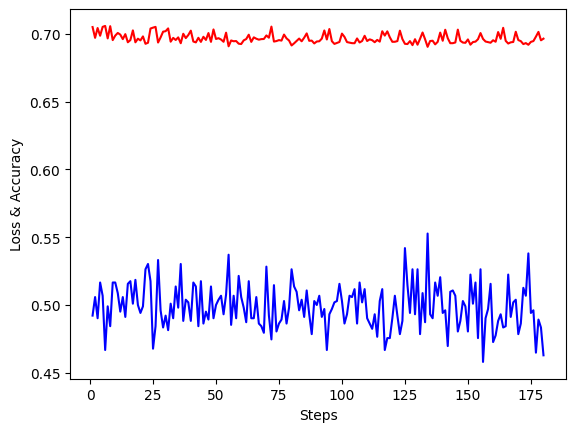

In [ ]:
b = []
for i in range(len(loss_list[50:])):
  b.append(i+1)
b = np.array(b)

plt.plot(b, loss_list[50:], 'r')
plt.plot(b, acc_list[50:], 'b')
plt.xlabel('Steps')
plt.ylabel('Loss & Accuracy')
plt.show()

In [ ]:
total_step = len(test_loader)
print(total_step)
loss_list_test = []
acc_list_test = []
with torch.no_grad():
    for i, (signals, labels) in enumerate(test_loader):
        # Run the forward pass
        #print(labels)
        signals=signals
        labels=labels
        outputs = cnn(signals.double())
        loss = criterion(outputs, labels.long())
        loss_list_test.append(loss.item())
        if epoch%10 ==0:
            print(loss)
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels.long()).sum().item()
        acc_list_test.append(correct / total)
        #print(outputs.shape)
        #print(outputs)
        #print(predicted)
        #print(labels.shape)
        if (epoch) % 1 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

In [ ]:
labels

In [ ]:
predicted

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(labels, predicted)

cm_display = ConfusionMatrixDisplay(cm).plot()


In [ ]:
from operator import truediv

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(labels, predicted, average='macro')
print('F1 score:', f1)